# Homework 4

- Execute the below code, then answer the numbered questions.

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0


In [2]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [3]:
# insert code here
features_numerical, features_categorical = features[3:], features[:3]
print("numerical features : ", features_numerical)
print("categorical features : ", features_categorical)

numerical features :  ['condition', 'odometer', 'auction_value']
categorical features :  ['make', 'transmission', 'state']


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [7]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['condition', 'odometer', 'auction_value', 'selling_price']
data_numeric = df[numerical_columns]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_columns)
df[numerical_columns] = data_scaled_df
df_scaled = df.copy()  # Create a copy of the original DataFrame
df_scaled[numerical_columns] = data_scaled_df  # Replace the numerical columns with the scaled values
print(df_scaled.head())

     make transmission state  condition  odometer  auction_value  \
0  nissan    automatic    md   1.286682       NaN      -0.208785   
1    ford    automatic    mo  -0.059005 -0.410221       0.209214   
2    ford    automatic    fl  -0.670680 -0.317985       0.402137   
3  nissan    automatic    ca        NaN -0.363805      -0.517462   
4    ford    automatic    nj  -1.160021 -0.405977       1.546812   

   selling_price  
0      -0.282593  
1       0.159909  
2       0.223123  
3      -0.649237  
4       1.297771  


## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [8]:
# insert code here
cp = Pipeline([('imputer_cl', SimpleImputer(strategy='most_frequent')), ('encoder_cl', OneHotEncoder(handle_unknown='ignore', drop='first')),])

cp_cols = cp.fit_transform(df[features_categorical])
new_df = pd.DataFrame(cp_cols.toarray(), columns=cp['encoder_cl'].get_feature_names_out(features_categorical))
new_df.head()

,make_chevrolet,make_chrysler,make_dodge,make_ford,make_honda,make_hyundai,make_kia,make_nissan,make_toyota,transmission_manual,...,state_or,state_pa,state_pr,state_sc,state_tn,state_tx,state_ut,state_va,state_wa,state_wi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [9]:
# insert code here
preprocessor = ColumnTransformer([('np_preprocessing', np, features_numerical),('cp_preprocessing', cp, features_categorical)])
pipeline = Pipeline([('preprocessing', preprocessor)])

processed_data = pipeline.fit_transform(df)

all_columns = features_numerical + list(preprocessor.named_transformers_['cp_preprocessing'].named_steps['encoder_cl'].get_feature_names_out(features_categorical))
df_processed = pd.DataFrame.sparse.from_spmatrix(processed_data, columns=all_columns)
df_processed.head()


,condition,odometer,auction_value,make_chevrolet,make_chrysler,make_dodge,make_ford,make_honda,make_hyundai,make_kia,...,state_or,state_pa,state_pr,state_sc,state_tn,state_tx,state_ut,state_va,state_wa,state_wi
0,1.333059,-0.185336,-0.191185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.081007,-0.410985,0.249020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.723764,-0.314109,0.452192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.176096,-0.362234,-0.516260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.237969,-0.406528,1.657678,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [10]:
model = LinearRegression()
model_pipeline = Pipeline([('preprocessing', preprocessor),('model_lr', model)])
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score is :', r2)

R2 score is : 0.8838275826302848


## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

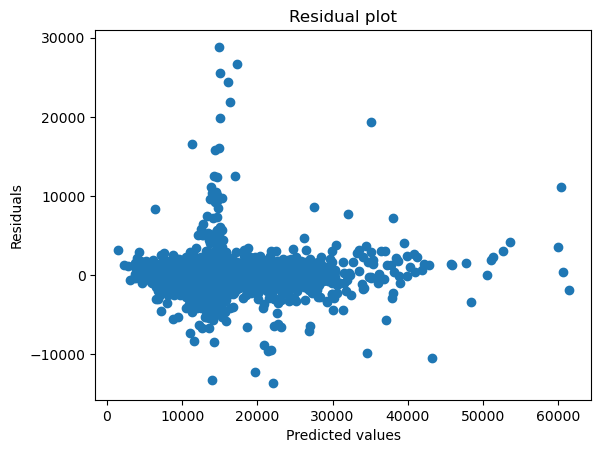

In [11]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

Insert description here.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [12]:
pipeline_ridge = Pipeline([('preprocessing', preprocessor),('regressor', Ridge(alpha=100))])
pipeline_ridge.fit(X_train, y_train)

y_pred = pipeline_ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score is :', r2)

R2 score is : 0.8824295262286399
